In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("weather.csv")

In [3]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.set_index('date', inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


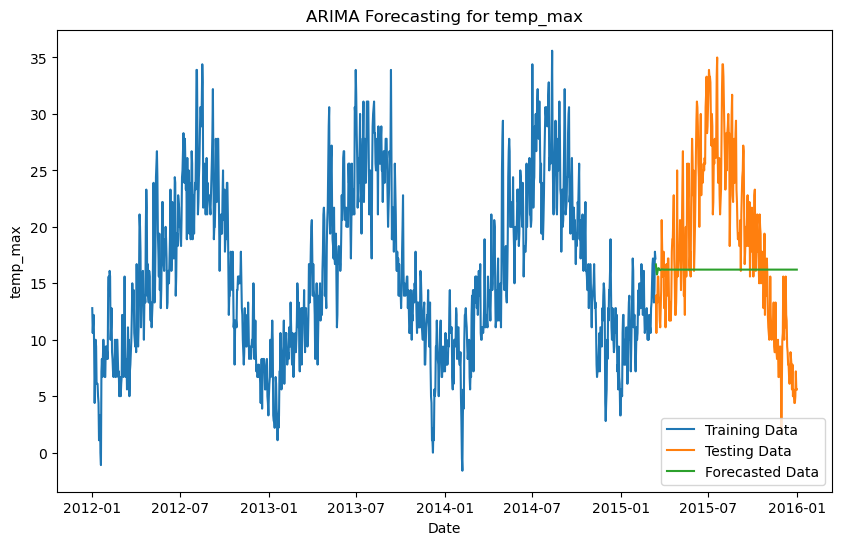

Root Mean Squared Error (RMSE): 7.841934306742531


In [14]:
def arima_model(data, target_variable, order):
    train_size = int(len(data) * 0.8)
    train_data, test_data = data[:train_size], data[train_size:]

    model = ARIMA(train_data[target_variable], order=order)
    fitted_model = model.fit()

    forecast = fitted_model.forecast(steps=len(test_data))

    rmse = np.sqrt(mean_squared_error(test_data[target_variable], forecast))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data[target_variable], label='Training Data')
    plt.plot(test_data.index, test_data[target_variable], label='Testing Data')
    plt.plot(test_data.index, forecast, label='Forecasted Data')
    plt.xlabel('Date')
    plt.ylabel(target_variable)
    plt.title('ARIMA Forecasting for ' + target_variable)
    plt.legend()
    plt.show()

    print("Root Mean Squared Error (RMSE):", rmse)

arima_model(data, 'temp_max', order=(5,1,0))
    
